In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools.config import load_config
import numpy as np
from tools.logger import logger


class Var:
    def __init__(self,config):
        self.config = config


        
    def load_returns(self):
        """ read in returns from path """
        try:
            returns  = pd.read_csv(self.config['returns_path'],delimiter=",")
            return returns
        except FileNotFoundError as fnfe:
            logger.exception(f"File Not Found Error: {fnfe}")
        except ExceptionGroup as e:
            logger.exception(f"Other Exception which was not called: {e}")
        raise None

    
    def get_var(self,ci=0.95):
        """
        value at risk
        """
        #returns
        returns = self.load_returns()

        value_at_risk = np.percentile(returns,(1 - ci)*100)
        return value_at_risk
    
    def get_cvar(self):
        """
        Conditional Value at Risk
        """

        returns = self.load_returns()

        value_at_risk = self.get_var()
        tail_risk = returns[returns < value_at_risk]
        cvar = np.mean(tail_risk)
        return cvar

if __name__ == "__main__":
    config = load_config()
    var_config = Var(config)
    returns = var_config.load_returns()
    var = var_config.get_var()
    cvar = var_config.get_cvar()
    print(f"Value at Risk: {var}")
    print(f"Conditional Value at Risk: {cvar}")
    

Value at Risk: -0.040177979566610005
Conditional Value at Risk: -0.07155331895380379


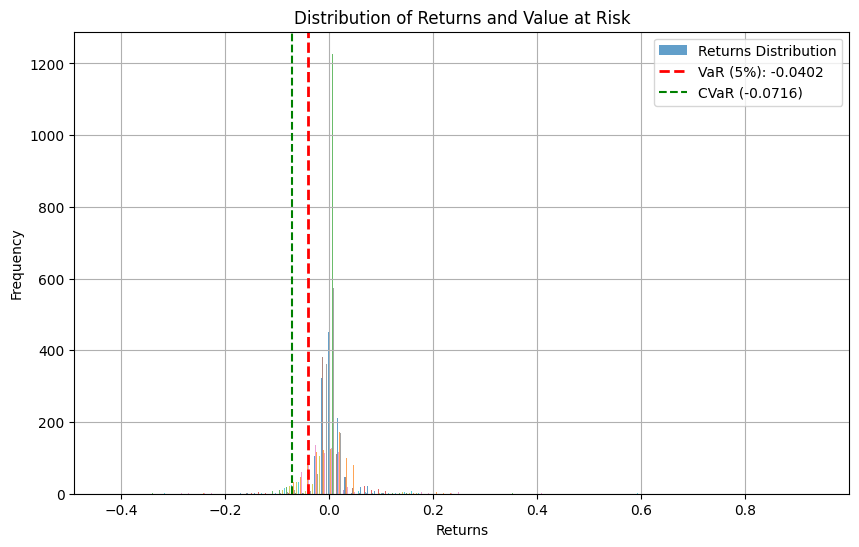

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=100, label="Returns Distribution", alpha=0.7)
plt.axvline(value_at_risk, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {value_at_risk:.4f}')
plt.axvline(x=cvar, color='green', linestyle='--', label=f'CVaR ({cvar:.4f})')
plt.title('Distribution of Returns and Value at Risk')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
